## 🧼 Wildlife Collision Data Cleaning Notebook

Goal: Clean, structure and enrich the raw wildlife collision dataset for ML model training and analysis.

In [ ]:
# -------------------------------------
#  1. Import libraries and load Excel files
# -------------------------------------
import pandas as pd
import glob

# Load all original Excel files (ignore header rows, mark source file)
files = glob.glob("../data/original_excels/*.xlsx")
dfs = []
for file in files:
    df = pd.read_excel(file, skiprows=6)
    df["Source_File"] = file
    dfs.append(df)

# Combine all Excel sheets into one dataframe
all_data = pd.concat(dfs, ignore_index=True)
print(f"✅ Loaded {len(all_data)} rows from {len(files)} files")

In [ ]:
all_data.to_csv('../data/raw_collision_data.csv', index=False)


In [ ]:
print(all_data.columns.tolist())

['DjurId', 'OlycksId', 'Källa', 'Typ av olycka', 'Datum', 'Tid', 'År', 'Månad', 'Dag på året', 'Unnamed: 9', 'Unnamed: 10', 'Veckodag', 'Län', 'Unnamed: 13', 'Kommun', 'Viltslag', 'Lat WGS84', 'Long WGS84', 'Lat RT90', 'Long RT90', 'Kön', 'Årsunge', 'Vad har skett med viltet', 'Källa_fil']


In [ ]:
all_data.columns = (
    all_data.columns
    .str.strip()
    .str.replace(" ", "_")
    .str.replace("å", "a")
    .str.replace("ä", "a")
    .str.replace("ö", "o")
)

In [ ]:
all_data.info()
all_data['Viltslag'].value_counts()
all_data['Datum'] = pd.to_datetime(all_data['Datum'], errors='coerce')
all_data['Månad'] = all_data['Datum'].dt.month
all_data['Veckodag'] = all_data['Datum'].dt.day_name()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 635851 entries, 0 to 635850
Data columns (total 24 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   DjurId                    242322 non-null  float64       
 1   OlycksId                  242322 non-null  float64       
 2   Kalla                     635851 non-null  object        
 3   Typ_av_olycka             635851 non-null  object        
 4   Datum                     635851 non-null  datetime64[ns]
 5   Tid                       635851 non-null  datetime64[ns]
 6   År                        635851 non-null  int64         
 7   Manad                     635851 non-null  int32         
 8   Dag_pa_aret               635851 non-null  int64         
 9   Unnamed:_9                0 non-null       float64       
 10  Unnamed:_10               0 non-null       float64       
 11  Veckodag                  635851 non-null  object        
 12  La

In [ ]:
cols_to_drop = ['Unnamed:_9', 'Unnamed:_10', 'Unnamed:_13', 'Kalla_fil']

for col in cols_to_drop:
    if col in all_data.columns:
        all_data = all_data.drop(columns=[col])

In [ ]:
print(all_data.columns.tolist())


['DjurId', 'OlycksId', 'Kalla', 'Typ_av_olycka', 'Datum', 'Tid', 'År', 'Manad', 'Dag_pa_aret', 'Veckodag', 'Lan', 'Kommun', 'Viltslag', 'Lat_WGS84', 'Long_WGS84', 'Lat_RT90', 'Long_RT90', 'Kon', 'Årsunge', 'Vad_har_skett_med_viltet', 'Månad']


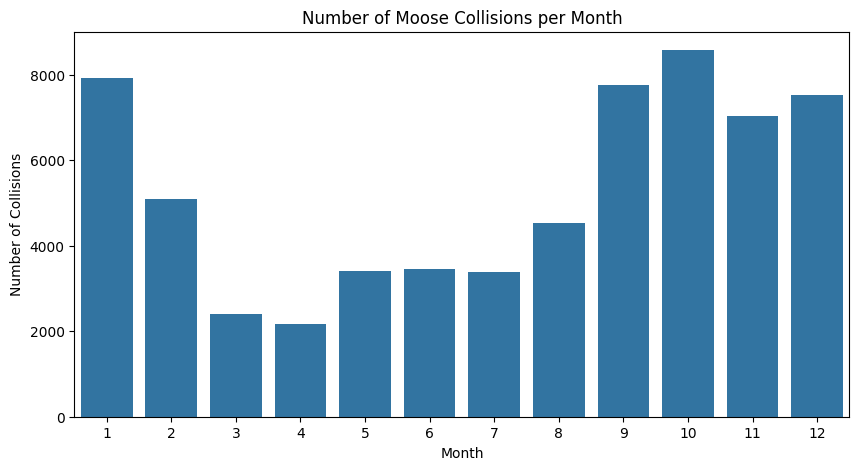

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filtrera bara på älg (eller byt till annat djur)
df_alg = all_data[all_data['Viltslag'] == 'Älg']

# Gruppa per månad
monthly_counts = df_alg['Manad'].value_counts().sort_index()

# Plot
plt.figure(figsize=(10, 5))
sns.barplot(x=monthly_counts.index, y=monthly_counts.values)
plt.title('Number of Moose Collisions per Month')
plt.xlabel('Month')
plt.ylabel('Number of Collisions')
plt.show()

In [ ]:
all_data.to_csv('../data/cleaned_data.csv', index=False)


## 🧼 Wildlife Collision Data Cleaning Notebook

Goal: Clean, structure and enrich the raw wildlife collision dataset for ML model training and analysis.

In [1]:
import pandas as pd

# 1. Läs in cleaned_data
df = pd.read_csv("../data/cleaned_data.csv")

# 2. Kolumner att ta bort
cols_to_drop = ['Date', 'Year', 'Month', 'Day_of_Year', 'Weekday']
df = df.drop(columns=cols_to_drop, errors='ignore')

# 3. Spara tillbaka till samma plats
df.to_csv("../data/cleaned_data.csv", index=False)

print("✅ Rensad och sparad som cleaned_data.csv")

✅ Rensad och sparad som cleaned_data.csv


In [23]:
species_translation = {
    "Älg": "Moose",
    "Rådjur": "Roe Deer",
    "Vildsvin": "Wild Boar",
    "Dovhjort": "Fallow Deer",
    "Kronhjort": "Red Deer",
    "Björn": "Brown Bear",
    "Lodjur": "Lynx",
    "Järv": "Wolverine",
    "Övriga djur": "Other",
    "Okänt": "Unknown"
}

sex_translation = {
    "Hane": "Male",
    "Hona": "Female",
    "Okänt": "Unknown"
}

juvenile_translation = {
    "Ja": "Yes",
    "Nej": "No",
    "Okänt": "Unknown"
}

fate_translation = {
    "Avlivat": "Euthanized",
    "Dött på olycksplatsen": "Dead at crash site",
    "Ej påträffat": "Not found",
    "Bedöms oskadat": "Assumed unharmed",
    "Påträffat dött": "Found dead",
    "Okänt": "Unknown"
}

all_data["Species"] = all_data["Viltslag"].map(species_translation)
all_data["Sex"] = all_data["Kon"].map(sex_translation)
all_data["Juvenile"] = all_data["Årsunge"].map(juvenile_translation)
all_data["Animal_Outcome"] = all_data["Vad_har_skett_med_viltet"].map(fate_translation)

all_data = all_data.drop(columns=["Viltslag", "Kon", "Årsunge", "Vad_har_skett_med_viltet"])

all_data.to_csv("../data/cleaned_data.csv", index=False)

In [25]:
column_rename = {
    "DjurId": "Animal_ID",
    "OlycksId": "Collision_ID",
    "Kalla": "Source",
    "Typ_av_olycka": "Type_of_Collision",
    "Datum": "Date",
    "Tid": "Time",
    "Ar": "Year",
    "Manad": "Month",
    "Dag_pa_aret": "Day_of_Year",
    "Veckodag": "Weekday",
    "Lan": "County",
    "Kommun": "Municipality",
    "Lat_WGS84": "Lat_WGS84",
    "Long_WGS84": "Lon_WGS84",
    "Lat_RT90": "Lat_RT90",
    "Long_RT90": "Lon_RT90",
    "Species": "Species",  # Already English
    "Sex": "Sex",
    "Juvenile": "Juvenile",
    "Animal_Outcome": "Animal_Outcome"
}

# 2. Värdeöversättningar (för källor och olyckstyper)
source_translation = {
    "Jägarrapporterad olycka (viltolycka.se)": "Hunter-reported collision (viltolycka.se)",
    "Polisrapporterad olycka (viltolycka.se)": "Police-reported collision (viltolycka.se)",
}

collision_type_translation = {
    "Väg": "Road",
    "Järnväg": "Railway"
}

# 3. Använd översättningarna
all_data = all_data.rename(columns=column_rename)

all_data["Source"] = all_data["Source"].map(source_translation).fillna(all_data["Source"])
all_data["Type_of_Collision"] = all_data["Type_of_Collision"].map(collision_type_translation).fillna(all_data["Type_of_Collision"])